/tmp/ipykernel_7129/518693554.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(attr_path, delim_whitespace=True, skiprows=1)


Total Images: 202599


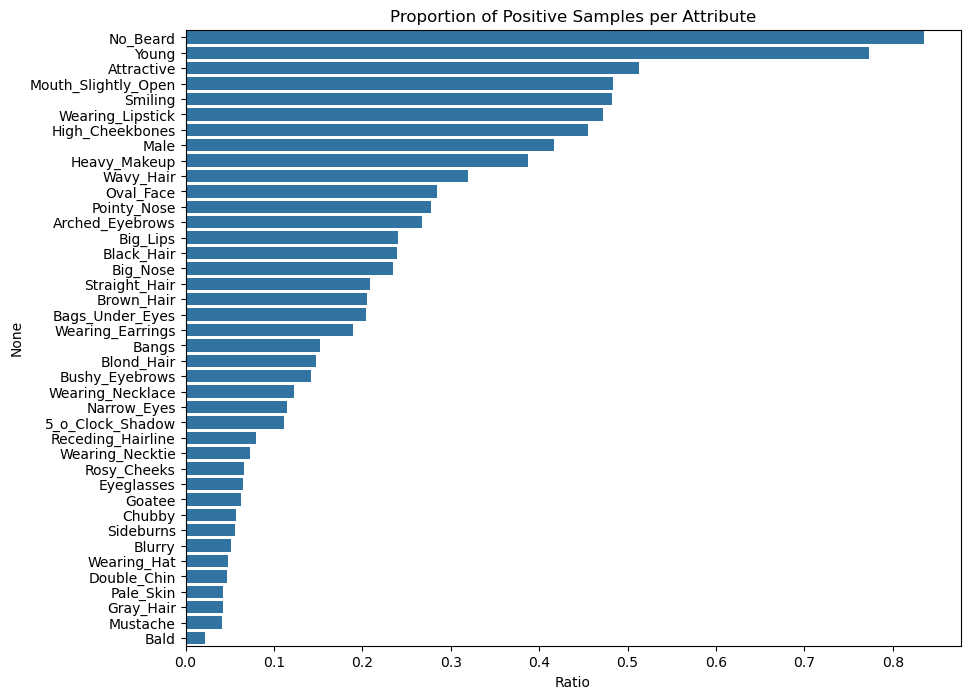

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你已经下载了 list_attr_celeba.txt
attr_path = 'data/CelebA1/Anno/list_attr_celeba.txt'

# 读取属性文件 (跳过前两行元数据)
df = pd.read_csv(attr_path, delim_whitespace=True, skiprows=1)

# 1. 检查数据量
print(f"Total Images: {len(df)}")

# 2. 计算每个属性的正样本比例
# CelebA中 1 表示由，-1 表示无。我们将 -1 映射为 0 以便计算平均值
df_binary = df.replace(-1, 0)
attr_counts = df_binary.mean().sort_values(ascending=False)

# 3. 可视化属性分布
plt.figure(figsize=(10, 8))
sns.barplot(y=attr_counts.index, x=attr_counts.values)
plt.title("Proportion of Positive Samples per Attribute")
plt.xlabel("Ratio")
plt.show()

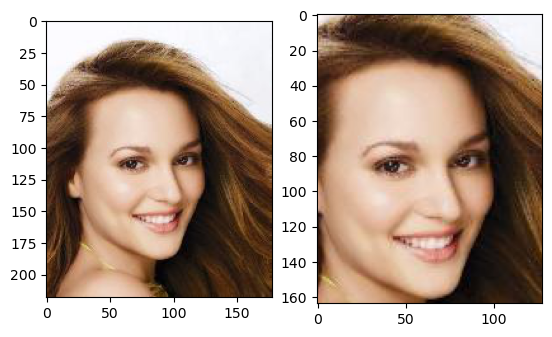

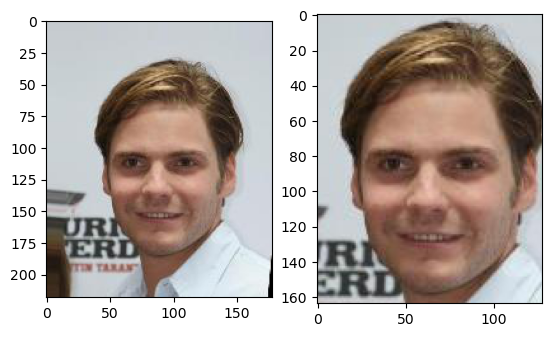

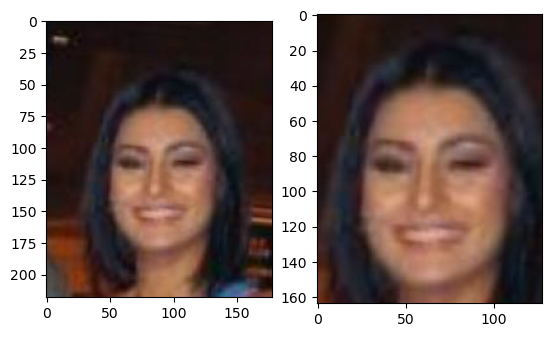

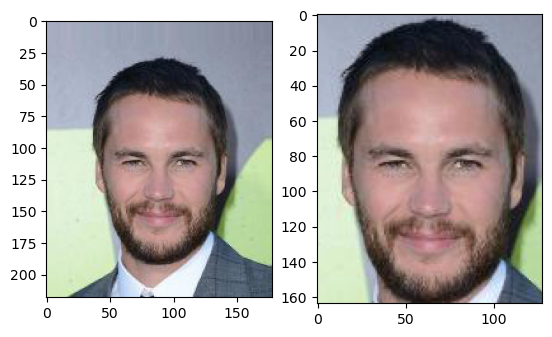

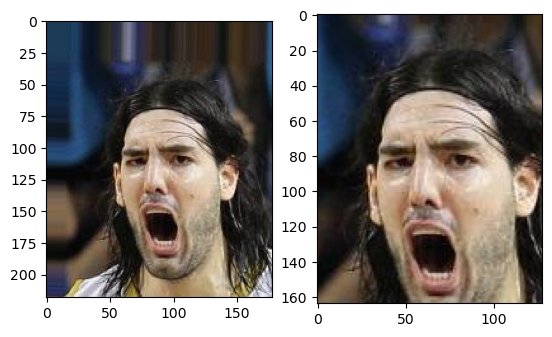

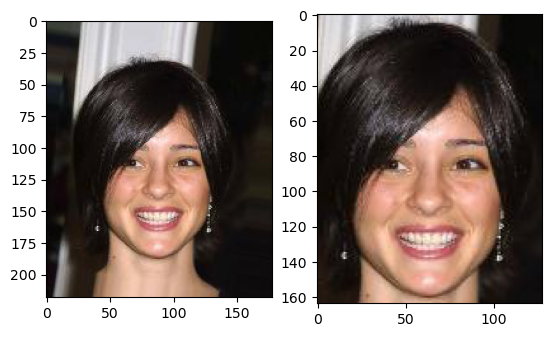

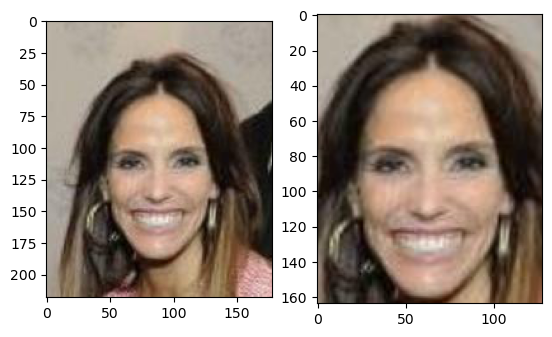

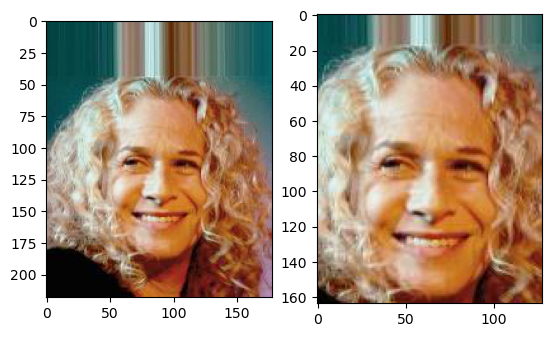

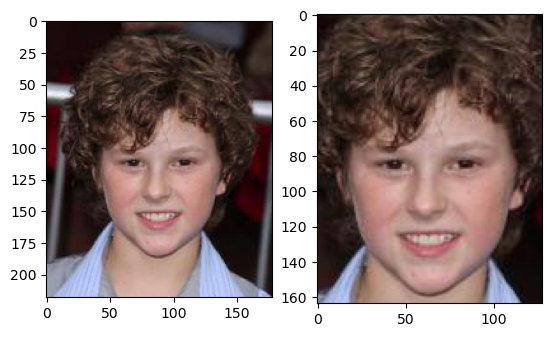

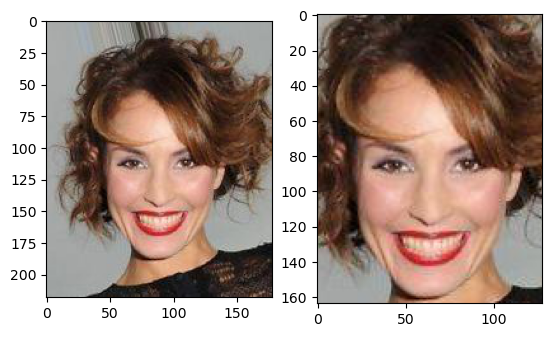

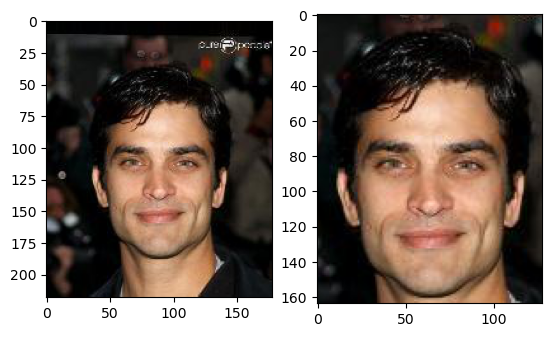

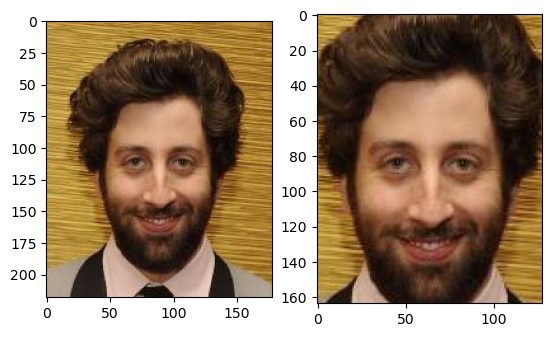

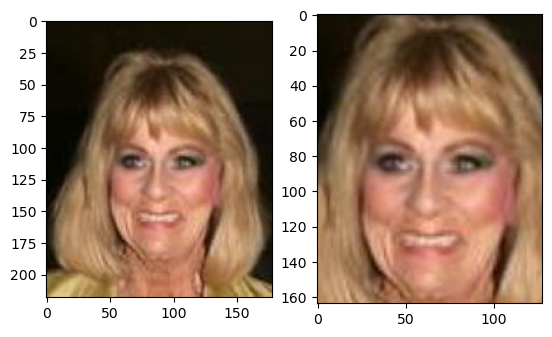

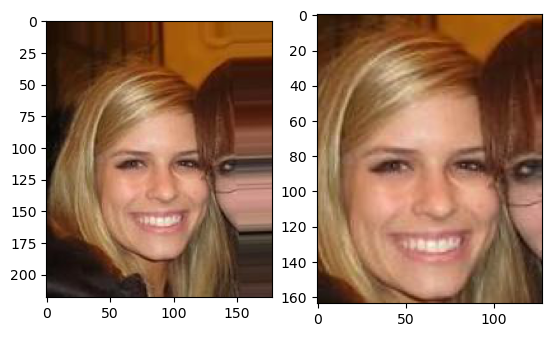

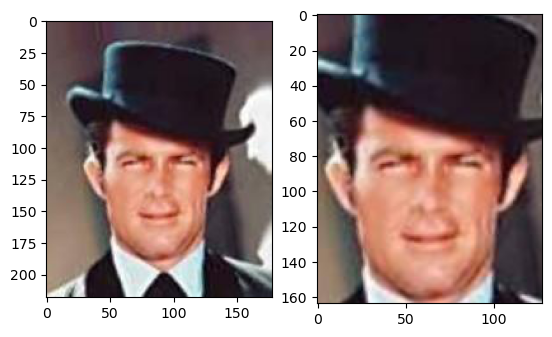

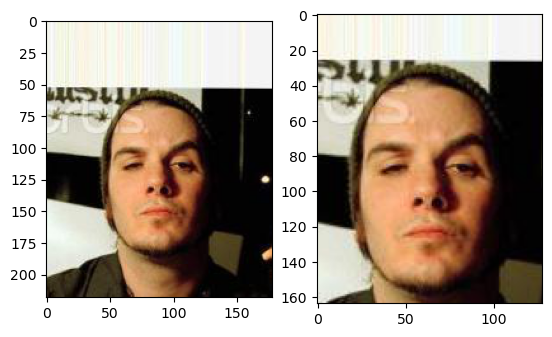

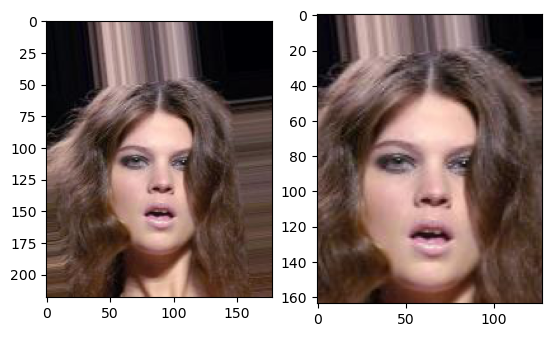

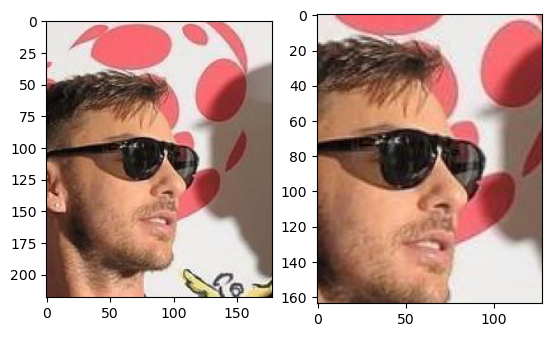

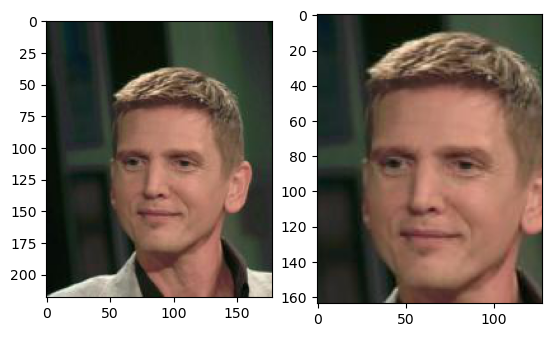

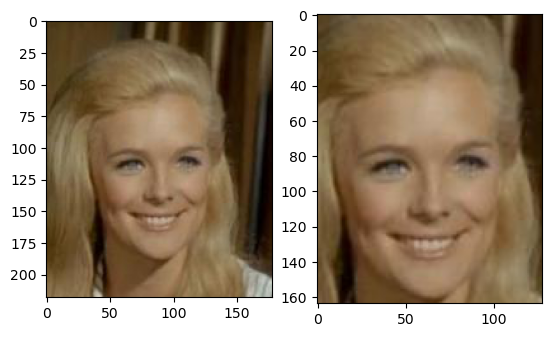

In [13]:
# center crop test
from my_dataset import CustomImageDataset
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define the transform
crop_size = (164, 128)
transform = transforms.Compose([
    transforms.CenterCrop(crop_size),
    transforms.ToTensor(),
])

# Load the dataset
img_dir = "data/CelebA1/Img/img_align_celeba"
image_paths = [os.path.join(img_dir, img_name) for img_name in os.listdir(img_dir)]
croped_dataset = CustomImageDataset(image_paths=image_paths, transform=transform)
original_dataset = CustomImageDataset(image_paths=image_paths)

# Create a DataLoader
croped_dataloader = DataLoader(croped_dataset, batch_size=1, shuffle=False)
original_dataloader = DataLoader(original_dataset, batch_size=1, shuffle=False)

# Visualize first 10 images
for i, images in enumerate(croped_dataloader):
    if i >= 20:
        break
    # Convert the tensor to a PIL image
    croped_img = transforms.ToPILImage()(images[0])
    original_img = original_dataset[i]
    
    # Display the 2 subplots
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(original_img)
    axs[1].imshow(croped_img)
    plt.show()
